In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.figure import figaspect
import seaborn as sns
from IPython.display import display
pd.set_option('max_rows', 5)
%matplotlib inline

# k-means

## ケーススタディ
---
マーケティング担当者として施策を考えるにあたり、累積購入金額に基づき顧客が 3 つのグループに分けられるのではないかと思っている。どのような方法が考えられるか。

## k 平均法 (k-means)
---
クラスタ数 k を指定して、データを分割する手法。

iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


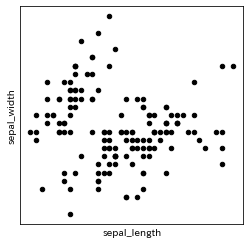

In [2]:
iris = sns.load_dataset('iris')
print('iris')
display(iris)
plt.figure(figsize=figaspect(1))
ax = plt.axes()
iris.plot.scatter('sepal_length', 'sepal_width', c='black', ax=ax)
ax.set(xticks=(), yticks=())
plt.show()

In [3]:
from my_functions.kmeans import visualization
visualization.show(iris[['sepal_length', 'sepal_width']])

interactive(children=(IntSlider(value=3, continuous_update=False, description='k', max=5, min=2), Output()), _…

## Pythonでのk-meansクラスタリング実行方法
---
`sklearn.cluster.KMeans`を用いる。

In [4]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for 

In [5]:
km = KMeans(n_clusters=3, random_state=1234)
data = iris[['petal_length', 'petal_width']].values
km.fit(data)
pred = km.predict(data)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


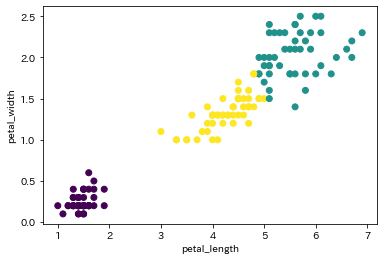

In [6]:
plt.scatter(data[:, 0], data[:, 1], c=pred)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

練習問題

---
mpg データセットの任意の変数 (複数) を元にいくつのクラスタに分けられそうか考え、 k-means クラスタリングを実行する。その後、意図した通りにクラスタリングできているか確認する。

In [7]:
mpg = sns.load_dataset('mpg')
print('mpg')
display(mpg)

mpg


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
...,...,...,...,...,...,...,...,...,...
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


## 推薦図書
---
- [Python 機械学習プログラミング 達人データサイエンティストによる理論と実践](https://www.amazon.co.jp/Python-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0-%E9%81%94%E4%BA%BA%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%83%86%E3%82%A3%E3%82%B9%E3%83%88%E3%81%AB%E3%82%88%E3%82%8B%E7%90%86%E8%AB%96%E3%81%A8%E5%AE%9F%E8%B7%B5-impress-gear/dp/4295003379/)
- [Pythonではじめる機械学習 ―scikit-learnで学ぶ特徴量エンジニアリングと機械学習の基礎](https://www.amazon.co.jp/Python%E3%81%A7%E3%81%AF%E3%81%98%E3%82%81%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92-%E2%80%95scikit-learn%E3%81%A7%E5%AD%A6%E3%81%B6%E7%89%B9%E5%BE%B4%E9%87%8F%E3%82%A8%E3%83%B3%E3%82%B8%E3%83%8B%E3%82%A2%E3%83%AA%E3%83%B3%E3%82%B0%E3%81%A8%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E5%9F%BA%E7%A4%8E-Andreas-C-Muller/dp/4873117984/)